In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [23]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [24]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15435,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.std()

label       2.887730
pixel0      0.000000
pixel1      0.000000
pixel2      0.000000
pixel3      0.000000
              ...   
pixel779    0.414264
pixel780    0.000000
pixel781    0.000000
pixel782    0.000000
pixel783    0.000000
Length: 785, dtype: float64

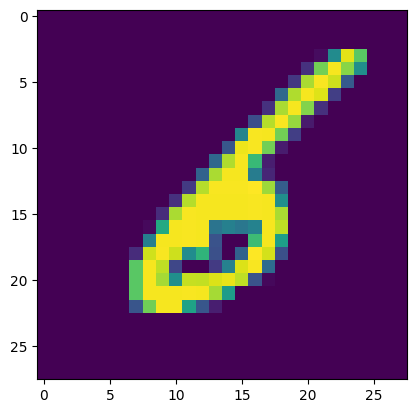

In [27]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[39803,1:].values.reshape(28,28))

In [28]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 0,test_size=0.2)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
import time
start = time.time()

y_pred = knn.predict(X_test)

print(time.time()-start)

14.264339447021484


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9680952380952381

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None) # no of PC = no of columns

In [37]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [38]:
X_train.shape

(33600, 784)

In [39]:
pca2 = PCA(n_components=200)

X_train_trf = pca2.fit_transform(X_train)
X_test_trf = pca2.transform(X_test)

X_train_trf.shape

(33600, 200)

In [40]:
knn2 = KNeighborsClassifier()

knn2.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn2.predict(X_test_trf)

In [42]:
accuracy_score(y_test,y_pred)

0.9504761904761905

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(i,accuracy_score(y_test,y_pred))

## The accuracy might not reach the original(with 788 columns) 96% but sacrificing 1% accuracy is better for that much less computation cost. 

## 2nd Use case of PCA -> Visualization

In [43]:
#IN 2 Dimension

pca = PCA(n_components=2)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [44]:
X_train_trf

array([[ 7.08568511,  2.60538408],
       [11.08327227,  2.20093926],
       [-2.34520958,  7.20805053],
       ...,
       [-5.04388247,  5.86141981],
       [11.75647926, -6.2759817 ],
       [-3.86604651,  4.80719192]])

In [45]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(data_frame = X_train_trf,x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [46]:
#IN 3 Dimension

pca = PCA(n_components=3)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [47]:
X_train_trf

array([[ 7.08558387,  2.60497205,  0.05028417],
       [11.08325769,  2.20075883, -1.31439191],
       [-2.3452949 ,  7.20803278,  0.05677564],
       ...,
       [-5.04390035,  5.86131845, -3.4538789 ],
       [11.7565298 , -6.27597583, -4.46589459],
       [-3.86602083,  4.80726969, -3.15616743]])

In [48]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [49]:
pca.explained_variance_ #top 3 eigenvalue (lambda)

array([40.64115119, 29.26140851, 26.64277376])

In [51]:
pca.components_ #eigenvectors 

array([[ 1.00000000e+00,  1.25304925e-10,  1.85723740e-10, ...,
        -6.52760907e-34,  7.59452288e-34,  2.26275537e-34],
       [-1.14130287e-10,  1.00000000e+00, -5.42668444e-09, ...,
         5.05409521e-34,  2.96070510e-33,  3.18623570e-35],
       [-1.64795722e-10,  5.25191628e-09,  9.99999999e-01, ...,
         1.09018839e-33,  4.15261354e-34,  2.47384446e-34]])

In [52]:
pca.components_.shape #3 vectors of 784 dimensions

(3, 784)

In [53]:
pca.explained_variance_ratio_ 

array([0.05830695, 0.04198069, 0.03822379])

first explains 5% of total variance of the data,2nd explains 4.1%,3rd explains 3.8%

In total these 3 features explains 13% variance of the data.

## Finding optimal number of principals components

In [55]:
pca = PCA(n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit(X_test)

In [56]:
pca.explained_variance_.shape #784 vectors each of 784 dimenisons

(784,)

In [59]:
pca.explained_variance_ratio_ #how much each PC is conntributuing to the variance of the data

array([1.63467887e-01, 4.85222282e-02, 3.37489173e-02, 3.23567420e-02,
       2.57252087e-02, 2.45744714e-02, 2.18571321e-02, 1.86332406e-02,
       1.59696116e-02, 1.48538943e-02, 1.36571501e-02, 1.28260262e-02,
       1.20064355e-02, 1.15001661e-02, 1.05899443e-02, 1.05196624e-02,
       1.01868142e-02, 9.55992093e-03, 9.41058211e-03, 8.70763029e-03,
       8.65203326e-03, 8.15600308e-03, 7.98963305e-03, 7.58150188e-03,
       7.45998417e-03, 7.32204521e-03, 7.04123987e-03, 6.80656060e-03,
       6.56362070e-03, 6.48922314e-03, 6.42450887e-03, 6.25941980e-03,
       6.02817208e-03, 5.98319573e-03, 5.90721844e-03, 5.83883012e-03,
       5.60132469e-03, 5.33650725e-03, 5.20159858e-03, 5.06168652e-03,
       5.00234956e-03, 4.95071720e-03, 4.83657954e-03, 4.75225120e-03,
       4.65033774e-03, 4.61638163e-03, 4.44061286e-03, 4.37194217e-03,
       4.25705187e-03, 4.24242094e-03, 3.98849154e-03, 3.97768355e-03,
       3.89598815e-03, 3.87080091e-03, 3.74192902e-03, 3.71810236e-03,
      

In [60]:
np.cumsum(pca.explained_variance_ratio_)

array([0.16346789, 0.21199011, 0.24573903, 0.27809577, 0.30382098,
       0.32839545, 0.35025259, 0.36888583, 0.38485544, 0.39970933,
       0.41336648, 0.42619251, 0.43819894, 0.44969911, 0.46028906,
       0.47080872, 0.48099553, 0.49055545, 0.49996603, 0.50867366,
       0.5173257 , 0.5254817 , 0.53347133, 0.54105284, 0.54851282,
       0.55583487, 0.56287611, 0.56968267, 0.57624629, 0.58273551,
       0.58916002, 0.59541944, 0.60144761, 0.60743081, 0.61333802,
       0.61917685, 0.62477818, 0.63011469, 0.63531629, 0.64037797,
       0.64538032, 0.65033104, 0.65516762, 0.65991987, 0.66457021,
       0.66918659, 0.6736272 , 0.67799914, 0.6822562 , 0.68649862,
       0.69048711, 0.69446479, 0.69836078, 0.70223158, 0.70597351,
       0.70969161, 0.7133049 , 0.71690388, 0.7204278 , 0.72391173,
       0.72733615, 0.73070851, 0.73402332, 0.73728682, 0.74046477,
       0.74359311, 0.7466984 , 0.74962955, 0.75253016, 0.75538476,
       0.75814789, 0.76089946, 0.76360153, 0.76625686, 0.76888

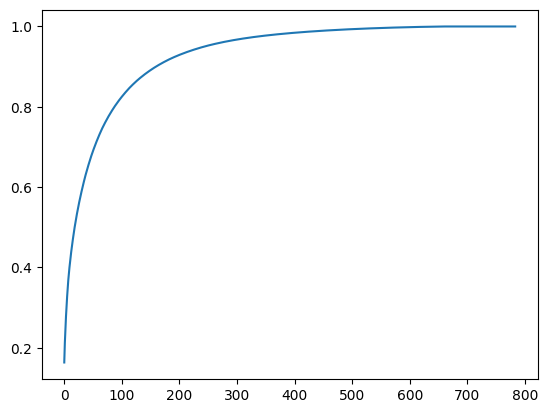

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# x axis - number of PC , y axis - how much variance is explained

## Almost at 200 , 90% variance is explained

## around 400 , 95% variance is explained